In [32]:
import pandas as pd
# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [17]:
df = pd.read_csv('Housing.csv')


In [18]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [19]:
# Check for missing values
missing_pct = df.isnull().mean() * 100
print(missing_pct[missing_pct > 0])  # Columns with missing values

Series([], dtype: float64)


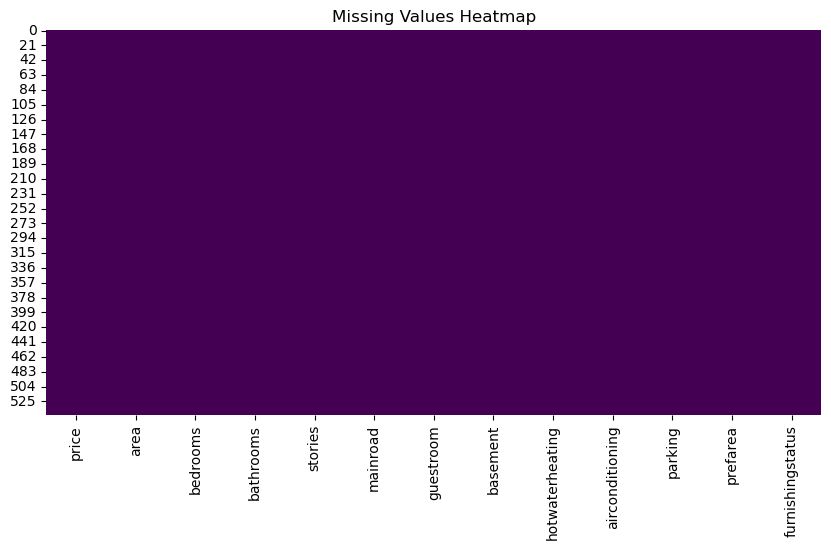

In [20]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [21]:
# Drop columns with more than 30% missing values
drop_cols = missing_pct[missing_pct > 30].index
df.drop(columns=drop_cols, inplace=True)

# Fill missing values for numerical columns with mean or median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values for categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [34]:
# Standardize column names (lowercase and replace spaces with underscores)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]


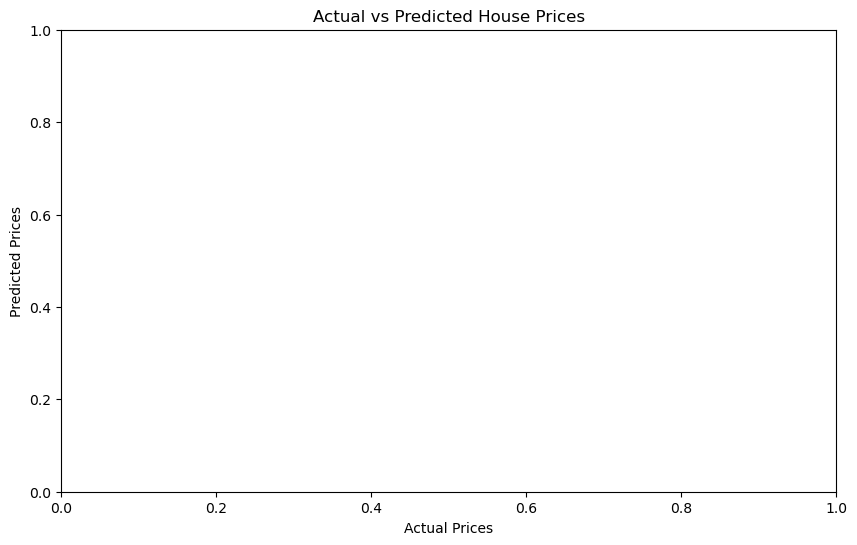

In [42]:
plt.figure(figsize=(10, 6))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()